# **KNN** #

**Regression**

**Imports**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor

**Loading Dataset**

In [66]:
df = pd.read_csv("../Datasets/energy_efficiency.csv")

df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


**Train/Test Split**

we will drop the cooling load from the dataset and make the target only heating load for this model

In [67]:
X = df.drop(["heating_load", "cooling_load"], axis=1)
y = df["heating_load"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=62)


**Determine the optimal k-value**

Based on iterations, best k-value is this:
1


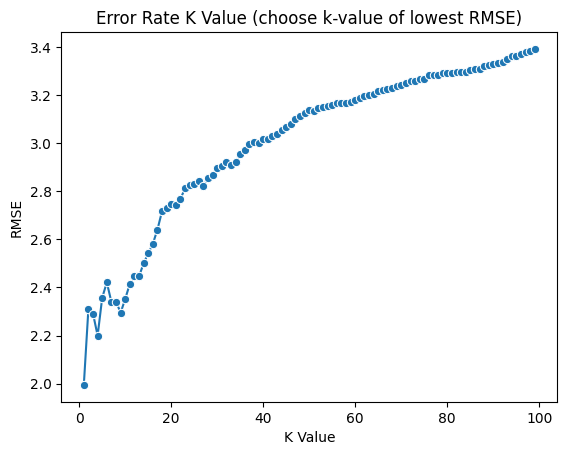

In [68]:
# this is a KNN-specific part, we have to search for the optimal
# k-value in our data
# NOTE: this part is a bit different depending on whether doing regression or classification

###################################

# CLASSIFIER VERSION
# adjust this to 50 or even 150 if you have lots of data rows
max_iterations = 100

# list to save the error values in the loop
error = []

# the default metric in scikit-learn
metric_selection = "minkowski"
weight_selection = 'uniform'
algorithm_selection = "auto"

# Calculating error for K values between 1 and 40
for i in range(1, max_iterations):

     # try with current k-value, train the model and make a test prediction
    knn = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=i, weights=weight_selection, algorithm=algorithm_selection, metric=metric_selection))
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    # save the error value for this k-value
    error.append(np.sqrt(metrics.mean_squared_error(y_test, pred_i)))
    
# plot all the k-values and their error values
sns.lineplot(x=range(1, max_iterations), y=error, marker='o')
plt.title('Error Rate K Value (choose k-value of lowest RMSE)')
plt.xlabel('K Value')
plt.ylabel('RMSE')

# choose best k-value based on metrics
# we have to add +1 to k-value, since argmin() returns an index
# which starts from 0, but k-values start from 1
print("Based on iterations, best k-value is this:")
k_value = np.argmin(error) + 1
print(k_value)

**SVM Model**

In [69]:
model = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=k_value, weights=weight_selection, algorithm=algorithm_selection, metric=metric_selection))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor(n_neighbors=1))])

**Error and performance metrics**

In [70]:
predictions = model.predict(X_test)

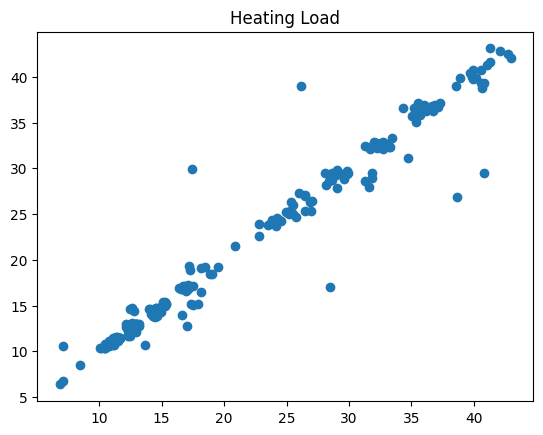

In [71]:
plt.scatter(y_test, predictions)
plt.title("Heating Load")
plt.show()


The plots seems to be following a diagonal lines showing that model is relatively performing well
but there are some outliers 

**Metrics**

In [72]:
#heating load metrics

# MAE - Mean average error
print("Heating Load Metrics:")
print("\nMAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2))

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2))

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2))

# R-squared. 0 =bad  1 =good
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))


Heating Load Metrics:

MAE
0.84

MSE
3.98

RMSE:
1.99

R-squared:
0.96


The metrics are quite average and it shows that there are some outliers. SvR and Random forests performed better than this model. This model might not be ideal for this dataset.

In [74]:
df.tail()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
763,0.64,784.0,343.0,220.5,3.5,5.0,0.4,5.0,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2.0,0.4,5.0,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3.0,0.4,5.0,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4.0,0.4,5.0,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5.0,0.4,5.0,16.64,16.03


**Prediction Test with Sample Data**

In [75]:
sample = pd.DataFrame({
    'relative_compactness': [0.64],
    'surface_area': [784.0],
    'wall_area': [343.0],
    'roof_area': [220.5],
    'overall_height': [3.5],
    'orientation': [5.0],
    'glazing_area': [0.4],
    'glazing_area_distribution': [5.0]
})

prediction = model.predict(sample)
heating_load =  prediction[0]

print(f"Heating Load: {heating_load:.2f}")


Heating Load: 15.16


The predictions are a bit off and not very accurate

**Summary**

We have imported all the libraries first then we imported the data and found optimal K-values and trained our model and it performed quite average but not as good as previous models 
